In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [4]:
tickers = pd.read_excel('tickers.xlsx')

In [5]:
tickers

,Company,Ticker,yfTicker,Industry,Headquarters
0,Alpargatas,ALPA4,ALPA4.SA,clothing,São Paulo
1,Ambev,ABEV3,ABEV3.SA,beverages,São Paulo
2,Americanas,AMER3,AMER3.SA,online retail,Rio de Janeiro
3,Azul,AZUL4,AZUL4.SA,airlines,Barueri
4,B3,B3SA3,B3SA3.SA,stock exchange,São Paulo
...,...,...,...,...,...
84,Usiminas,USIM5,USIM5.SA,siderurgy and metallurgy,Belo Horizonte
85,Vale,VALE3,VALE3.SA,mining,Rio de Janeiro
86,Via,VIIA3,VIIA3.SA,retail,São Caetano do Sul
87,YDUQS,YDUQ3,YDUQ3.SA,higher education,Rio de Janeiro


In [6]:
list_tickers = list(tickers['yfTicker'])

In [7]:
list_tickers

['ALPA4.SA',
 'ABEV3.SA',
 'AMER3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBSE3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BIDI11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRML3.SA',
 'BRKM5.SA',
 'BRFS3.SA',
 'BRFS3.SA',
 'CRFB3.SA',
 'CCRO3.SA',
 'CVCB3.SA',
 'CMIG4.SA',
 'CIEL3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CPFE3.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'ENBR3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENGI11.SA',
 'ENEV3.SA',
 'EGIE3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'GGBR4.SA',
 'GOLL4.SA',
 'PCAR3.SA',
 'SOMA3.SA',
 'FLRY3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTA3.SA',
 'GNDI3.SA',
 'IRBR3.SA',
 'ITUB4.SA',
 'ITSA4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'RENT3.SA',
 'LWSA3.SA',
 'LAME4.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'CASH3.SA',
 'GOAU4.SA',
 'BEEF3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PETR4.SA',
 'BRDT3.SA',
 'PRIO3.SA',
 'PETZ3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RDOR3.SA',
 'RAIL3.SA',
 'SBSP3.SA',
 'SANB11.SA',
 'ASAI3.SA',
 'SULA11

In [9]:
start = '2016-09-27'
end = '2021-10-27'

In [10]:
dados = yf.download(tickers = list_tickers,start = start, end = end )

[*********************100%***********************]  88 of 88 completed


In [14]:
dados_companies = dados['Adj Close']

In [15]:
dados_companies.head()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-27,17.147043,7.397343,15.444991,NaN,NaN,4.723043,18.027487,13.121272,15.022013,21.064205,...,13.371390,6.991767,10.075364,33.141270,3.110945,12.798547,2.796161,26.856382,6.102190,14.940697
2016-09-28,17.277603,7.404783,15.541522,NaN,NaN,4.765114,18.366293,13.199075,15.112229,21.002874,...,13.181423,7.097703,10.091129,33.305401,3.310481,13.227592,2.796161,26.679522,6.294665,15.092019
2016-09-29,17.164450,7.203851,15.107132,NaN,NaN,4.661342,17.830505,12.956511,14.861617,20.668953,...,13.077245,7.027079,9.659104,33.141270,3.310481,13.082151,3.074782,26.387009,6.255458,14.486745
2016-09-30,17.251493,7.188966,15.396725,NaN,NaN,4.714629,17.964458,12.974818,14.871633,20.362295,...,12.856637,6.974111,9.580267,33.324165,3.201644,12.951261,3.074782,26.482252,6.294665,14.184106
2016-10-03,17.190563,7.330364,15.908341,NaN,NaN,4.880105,18.389936,13.269598,15.224853,20.750732,...,12.807616,7.071218,9.990220,33.572708,3.237923,13.162142,3.094684,26.585915,6.312489,14.494708


In [12]:
dados_companies.dropna(inplace = True, axis = 1)

C:\Users\ivenv\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
dados_companies.head()

""
Date
2016-09-27
2016-09-28
2016-09-29
2016-09-30
2016-10-03


In [12]:
retornos = np.log(dados_companies/dados_companies.shift(1))

In [13]:
retornos.dropna(inplace = True, axis = 0)

In [14]:
retornos

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-28,-0.024945,-0.049549,-0.063980,-0.003643,-0.042378,-0.055612,-0.020633,-0.023028,-0.021308,-0.001483,...,-0.004347,-0.038179,-0.035053,-0.026984,-0.075508,-0.051427,-0.023736,-0.023216,-0.004661,-0.059973
2021-09-29,0.003233,0.003181,-0.004479,-0.011009,0.008135,0.000362,0.005453,0.015224,0.017949,0.005425,...,0.000544,-0.000846,-0.003376,-0.002672,0.059709,0.012612,-0.006341,0.006149,-0.019867,0.034356
2021-09-30,-0.012342,-0.013544,-0.008694,0.003683,-0.016885,-0.000785,-0.017833,-0.000560,0.001441,-0.018868,...,-0.025074,-0.000272,0.017324,-0.014146,0.026400,0.005788,-0.019268,0.010788,-0.006038,-0.021649
2021-10-01,-0.001963,0.009800,0.035270,0.016667,0.061513,0.037740,0.022242,0.021053,0.024657,0.021815,...,0.001394,0.007630,0.018389,0.022804,0.045476,-0.000525,0.072532,0.007903,0.013534,0.049672
2021-10-04,-0.015177,-0.061094,-0.086699,-0.002068,-0.046520,-0.064791,-0.011915,-0.037047,-0.028581,-0.027344,...,-0.001952,-0.015319,-0.053055,-0.024842,-0.053573,-0.009361,-0.073830,-0.007731,-0.035216,-0.055158
2021-10-05,0.009265,-0.029744,0.037425,-0.005189,-0.019397,-0.020367,0.046504,0.023080,0.016743,0.007032,...,-0.009819,0.002570,-0.031166,-0.000680,-0.003759,-0.007179,0.019293,0.014708,-0.032764,-0.009354
2021-10-06,-0.005284,-0.018867,0.070588,-0.002766,-0.016129,0.005745,0.001633,0.003888,0.007561,-0.011072,...,0.008702,-0.009454,-0.013403,-0.026190,-0.009461,0.027763,0.033817,-0.007677,-0.000533,-0.003423
2021-10-07,-0.001325,-0.020083,-0.025694,-0.010515,-0.008729,0.003268,-0.010499,-0.021289,-0.025270,-0.001013,...,0.004462,0.001726,0.000600,-0.014773,-0.000634,0.029410,-0.041489,0.008835,0.001332,0.093633
2021-10-08,0.018397,0.009775,0.056392,-0.033319,0.014041,0.018586,0.020888,0.015173,0.006737,0.016081,...,0.017651,0.043852,0.037929,0.040964,0.048277,0.006155,0.034073,0.040822,0.028607,0.045029


In [15]:
carac_empresa = retornos.T

In [16]:
carac_empresa.head()

Date,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-11,2021-10-13,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26
ABEV3.SA,-0.024945,0.003233,-0.012342,-0.001963,-0.015177,0.009265,-0.005284,-0.001325,0.018397,-0.007843,0.017561,-0.001290,0.002579,0.005779,-0.031212,0.017676,-0.017676,-0.009290,0.017840,-0.007230
ALPA4.SA,-0.049549,0.003181,-0.013544,0.009800,-0.061094,-0.029744,-0.018867,-0.020083,0.009775,-0.002753,0.018696,-0.011723,0.003363,-0.006950,-0.037683,0.004816,-0.030601,-0.017261,0.039529,-0.033590
AMER3.SA,-0.063980,-0.004479,-0.008694,0.035270,-0.086699,0.037425,0.070588,-0.025694,0.056392,0.001481,0.030314,-0.015334,0.087861,0.042348,-0.001024,0.019034,-0.116088,-0.049185,0.017346,-0.057278
ASAI3.SA,-0.003643,-0.011009,0.003683,0.016667,-0.002068,-0.005189,-0.002766,-0.010515,-0.033319,-0.050431,0.029447,-0.003354,-0.018080,-0.033626,-0.024472,0.010817,-0.018095,-0.019669,0.001241,-0.011222
AZUL4.SA,-0.042378,0.008135,-0.016885,0.061513,-0.046520,-0.019397,-0.016129,-0.008729,0.014041,-0.022276,-0.002855,0.005418,0.012998,-0.036014,-0.109378,-0.003904,-0.032801,-0.016984,0.005807,-0.087507


In [17]:
transform = Normalizer().fit(carac_empresa)

In [18]:
norm_ret = transform.transform(carac_empresa)

In [19]:
model = TSNE(learning_rate=50)

In [20]:
tsne_features = model.fit_transform(norm_ret)

In [21]:
tsne_features

array([[ 1.6846721 , -1.0637474 ],
       [ 1.0361218 ,  0.54896754],
       [-1.829446  ,  0.26527986],
       [ 4.97274   , -1.8558742 ],
       [ 0.8526106 ,  2.7894394 ],
       [ 2.5015013 , -0.7698348 ],
       [-1.2276052 , -0.9765025 ],
       [-1.0677353 , -1.0370117 ],
       [-1.1967828 , -1.0564276 ],
       [ 1.6022204 , -2.1869974 ],
       [ 0.5940888 , -3.9563468 ],
       [ 3.337246  , -0.7149036 ],
       [ 3.501776  , -0.71493214],
       [-0.62841237,  5.377698  ],
       [ 3.4360855 ,  2.0419059 ],
       [ 0.59177226, -3.9123392 ],
       [-1.903353  , -2.5922894 ],
       [ 2.5219235 ,  1.7518548 ],
       [ 1.0143082 ,  0.6685783 ],
       [ 2.036427  ,  0.7173259 ],
       [ 0.55855876, -0.5381694 ],
       [ 3.5670805 ,  3.8957293 ],
       [ 2.881673  ,  0.5684782 ],
       [ 5.981729  ,  2.3489828 ],
       [-0.7384127 ,  0.01329293],
       [-1.9990897 ,  1.644261  ],
       [ 3.3129902 ,  1.0097845 ],
       [-0.63290995,  4.146067  ],
       [ 0.6625891 ,

In [22]:
names= list(carac_empresa.merge(tickers,left_on=carac_empresa.index,right_on='yfTicker')['Company'])

In [23]:
names

['Ambev',
 'Alpargatas ',
 'Americanas',
 'Sendas Distribuidora',
 'Azul',
 'B3',
 'Banco do Brasil',
 'Bradesco',
 'Bradesco',
 'BB Seguridade',
 'Minerva Foods',
 'Banco Inter ',
 'Banco Pan',
 'Bradespar',
 'Petrobras Distribuidora',
 'BRF',
 'BTG Pactual',
 'Braskem',
 'BRMalls',
 'Méliuz',
 'CCR',
 'Cielo',
 'CEMIG',
 'Cogna',
 'CPFL Energia',
 'Copel',
 'Carrefour Brasil',
 'Cosan',
 'CSN',
 'CVC Brasil',
 'Cyrela Brazil Realty',
 'EcoRodovias',
 'ENGIE Brasil',
 'Eletrobras',
 'Eletrobras',
 'Embraer',
 'EDP - Energias do Brasil',
 'Eneva',
 'Energisa ',
 'Equatorial Energia ',
 'Eztec [pt]',
 'Grupo Fleury ',
 'Gerdau',
 'Intermédica',
 'Metalúrgica Gerdau',
 'Gol',
 'Grupo Hapvida ',
 'Hypera Pharma',
 'Iguatemi',
 'IRB Brasil RE',
 'Itaúsa',
 'Itaú Unibanco',
 'JBS',
 'JHSF Participações',
 'Klabin',
 'Lojas Americanas',
 'Unidas ',
 'Lojas Renner',
 'LocaWeb',
 'Magazine Luiza',
 'Marfrig',
 'MRV',
 'Multiplan',
 'Natura & Co',
 'GPA',
 'Petrobras',
 'Petz ',
 'PetroRio ',
 

In [24]:
x = tsne_features[:,0]

In [25]:
y = tsne_features[:,1]

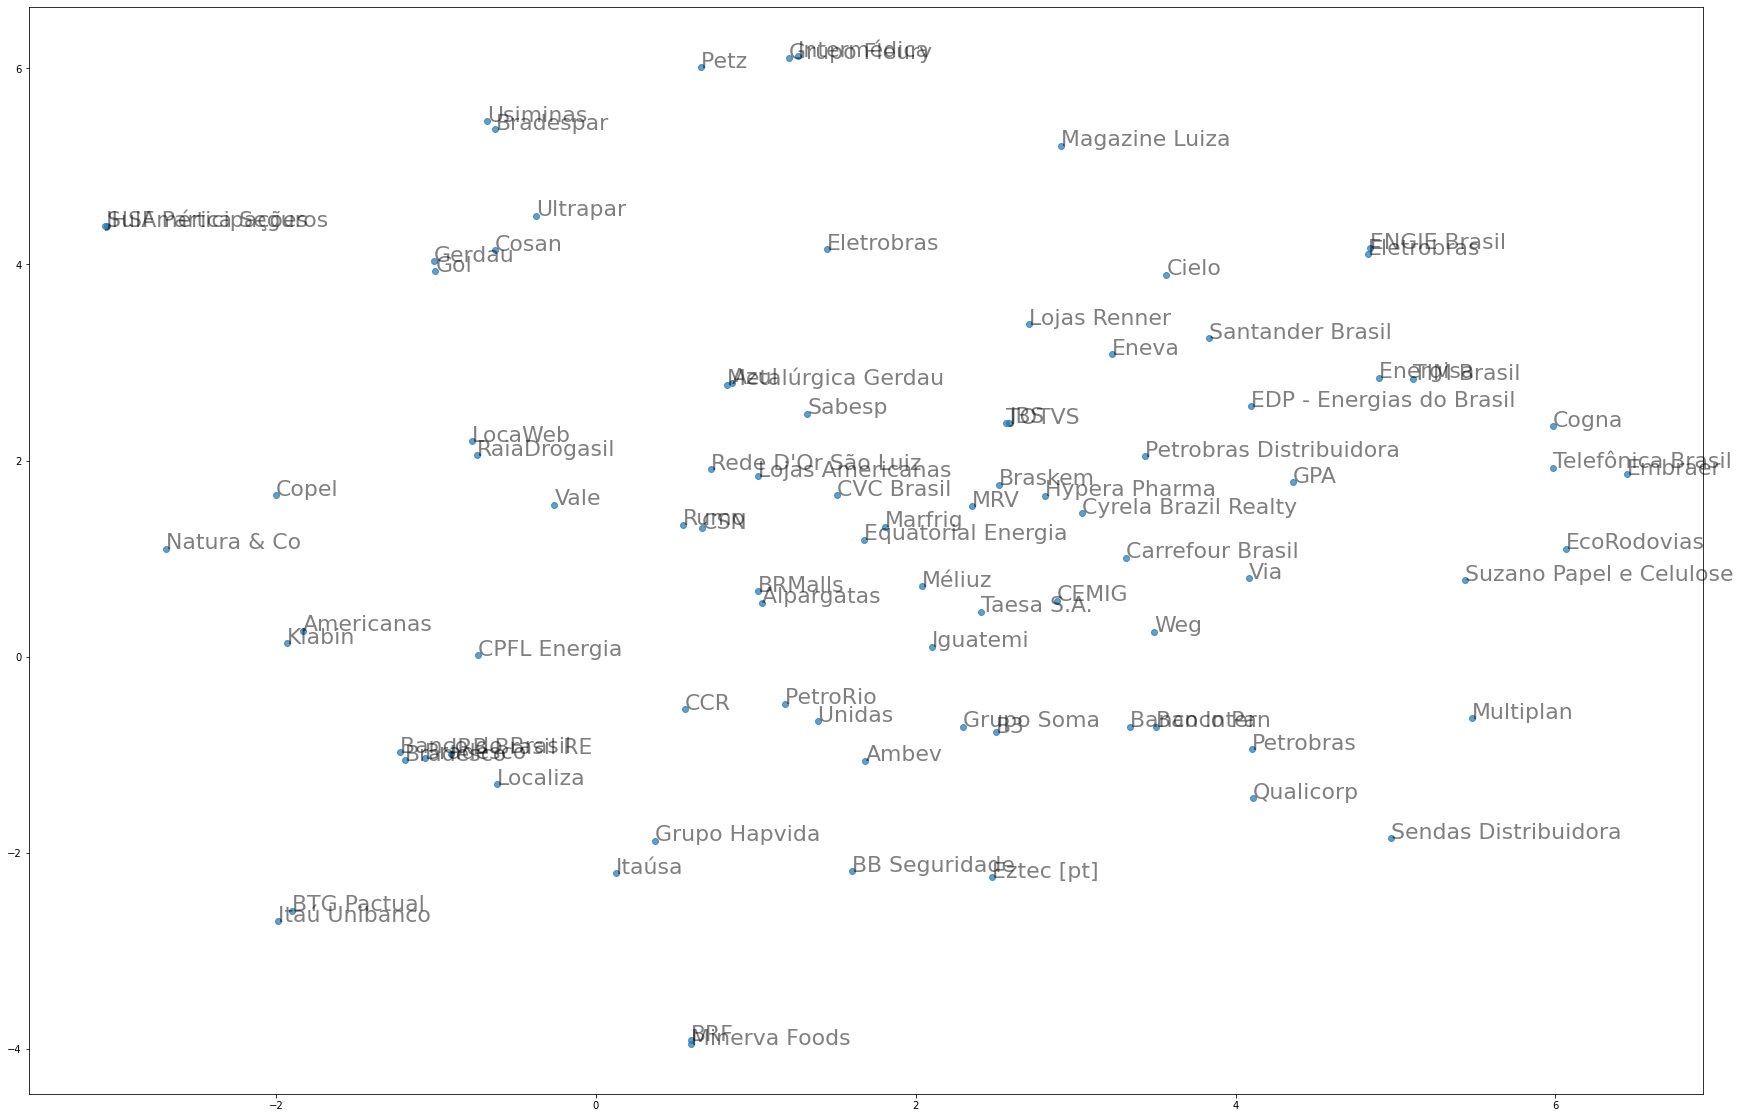

In [28]:

plt.figure(figsize = (30,20))
plt.scatter(x,y, alpha = 0.7)
for a, b, empresa in zip(x, y, names):
    plt.annotate(empresa, (a, b), fontsize=22, alpha=0.5)
plt.show()